# Netflix Data Cleaning Analysing and visualisation 

## Introduction
This project analyzes Netflix movies and TV shows to understand content distribution,
ratings, country-wise contribution, and release trends using Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\harsha\netflix_titles.csv.csv") 

In [3]:
data.show_id

0          s1
1          s3
2          s6
3         s14
4          s8
        ...  
8785    s8797
8786    s8798
8787    s8801
8788    s8784
8789    s8786
Name: show_id, Length: 8790, dtype: object

In [4]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


(8790, 10)

In [6]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [8]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [9]:
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day


## Exploratory Data Analysis (EDA)

In [11]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

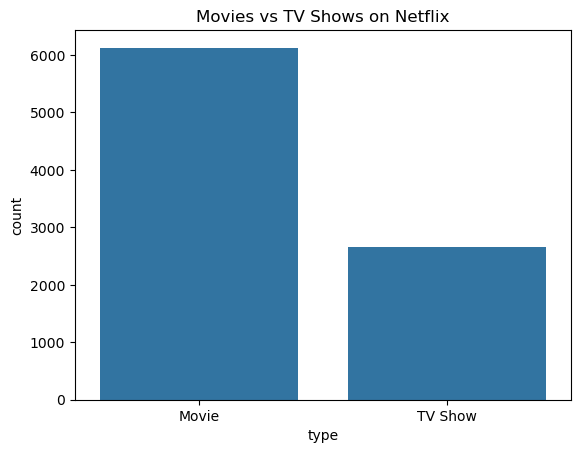

In [13]:


import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.savefig("images/netflix_content_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

 Insight:

Netflix has more Movies than TV Shows



4.2 Rating distribution

In [12]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

 Chart

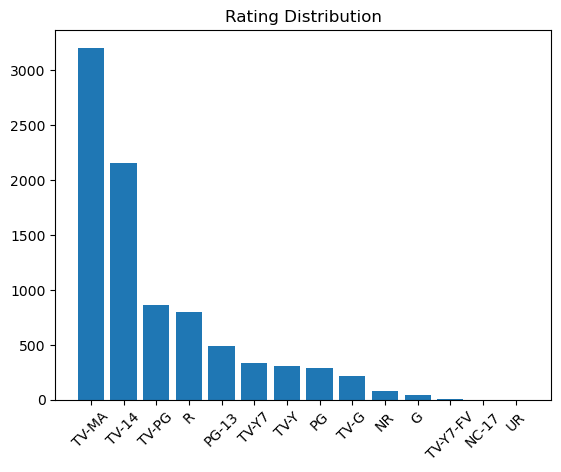

In [14]:


plt.bar(data['rating'].value_counts().index,
        data['rating'].value_counts().values)
plt.xticks(rotation=45)
plt.title("Rating Distribution")
plt.savefig("images/netflix_content_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

 Insight:

TV-MA and TV-14 dominate Netflix content

4.3 Country-wise content

In [16]:
top_countries = data['country'].value_counts().head(10)

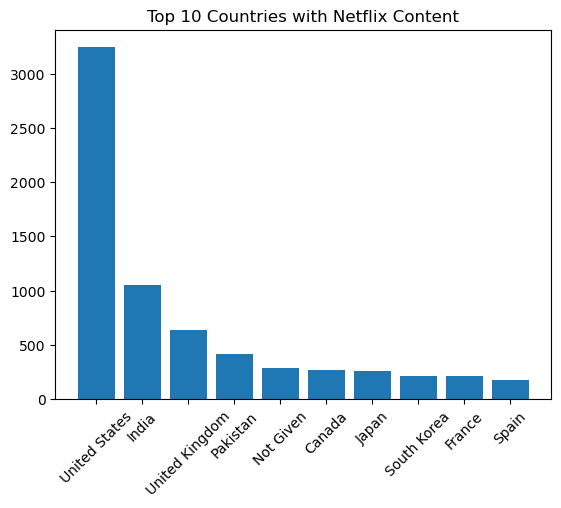

In [17]:
plt.bar(top_countries.index, top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Netflix Content")
plt.savefig("images/netflix_content_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

 Insight:

USA, India, UK produce most content

4.4 Content added over time
Monthly releases

In [18]:
monthly_movie = data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_tv = data[data['type']=='TV Show']['month'].value_counts().sort_index()

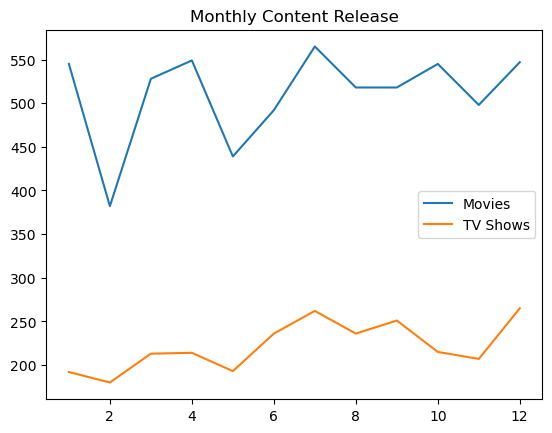

In [19]:
plt.plot(monthly_movie, label="Movies")
plt.plot(monthly_tv, label="TV Shows")
plt.legend()
plt.title("Monthly Content Release")
plt.savefig("images/netflix_content_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

 Insight:

Netflix adds more content during specific months

4.5 Popular genres

In [20]:
popular_movies = data[data['type']=='Movie']['listed_in'].value_counts().head(10)

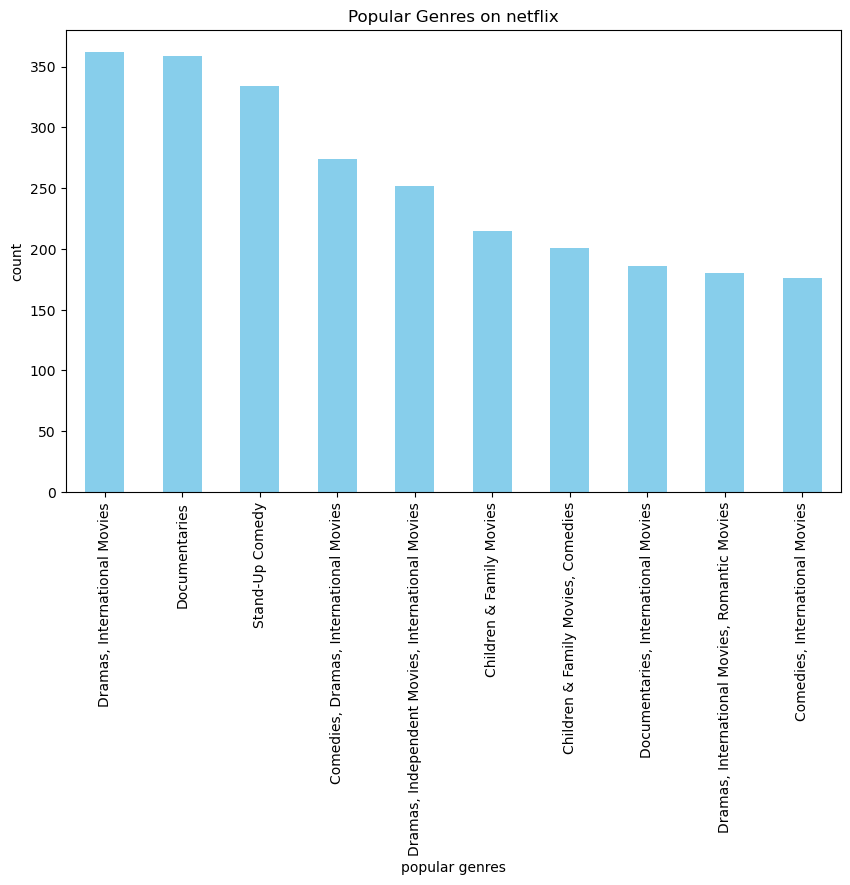

In [21]:
popular_movies.plot(kind='bar',figsize=(10,6),color='skyblue')
plt.title('Popular Genres on netflix')
plt.xlabel('popular genres')
plt.ylabel('count')
plt.savefig("images/netflix_content_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

 Insight:

Dramas, Comedies, International Movies dominate

4.6 Top directors

In [22]:
top_directors = data['director'].value_counts().head(15)

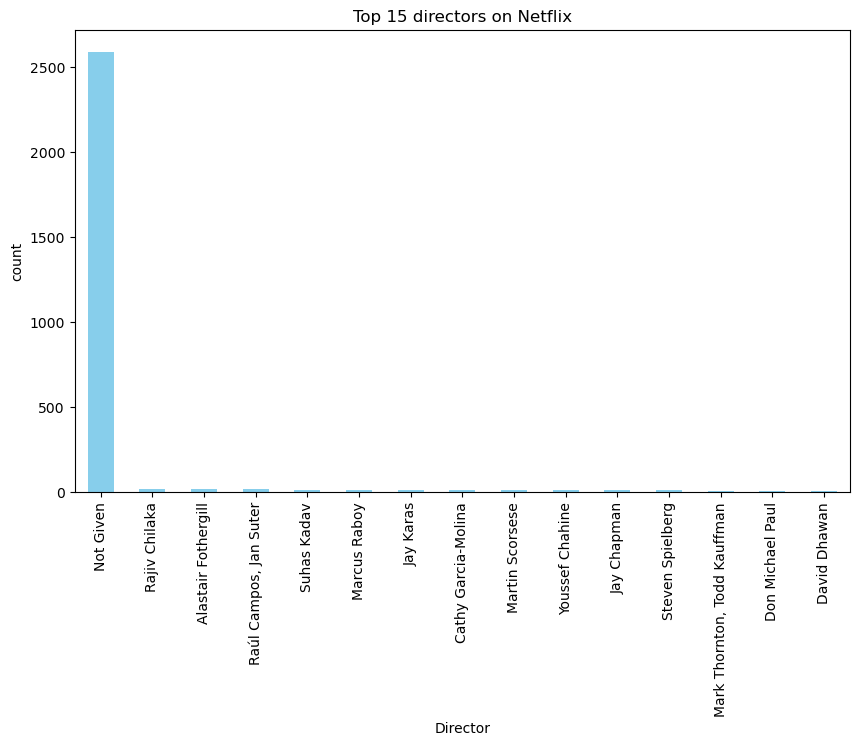

In [23]:

top_directors.plot(kind='bar',figsize=(10,6),color='skyblue')
plt.title('Top 15 directors on Netflix')
plt.xlabel('Director')
plt.ylabel('count')
plt.savefig("images/netflix_content_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

 Insight:

Certain directors have multiple Netflix titles

## Key Insights

-->Netflix has more movies than TV shows.

-->Content addition increased significantly after 2016.

-->TV-MA is the most common rating on Netflix.

-->United States and India contribute the most content.

-->Dramas and International Movies dominate Netflix genres.

## Conclusion


This project analyzed Netflix movies and TV shows using Python. After cleaning the dataset, exploratory data analysis was performed to understand content distribution, ratings, countries, and release trends. The insights provide a better understanding of Netflix’s content growth and strategy.